In [1]:
import pickle
f = open(tmp/val_result/part_0.pkl,'rb')
data = pickle.load(f,encoding='latin1')

ModuleNotFoundError: No module named 'cPickle'

In [3]:
import pandas as pd
from tqdm import tqdm
bbox_label = pd.read_csv("bbox_label.csv",header=None)
df = pd.DataFrame()
image_name = []
x1 = []
y1 = []
x2 = []
y2 = []
pbar = tqdm(total=len(bbox_label))
for i in range(len(bbox_label)):
    image_name.append(bbox_label.iloc[i,0].split(" ")[0])
    x1.append(bbox_label.iloc[i,0].split(" ")[1])
    y1.append(bbox_label.iloc[i,0].split(" ")[2])
    x2.append(bbox_label.iloc[i,0].split(" ")[3])
    y2.append(bbox_label.iloc[i,0].split(" ")[4])
    pbar.update(1)
df['image_name'] = image_name
df['x1'] = x1
df['y1'] = y1
df['x2'] = x2
df['y2'] = y2
df.to_csv("bbox_label1.csv",header=None,index=None)


100%|██████████| 28142/28142 [00:19<00:00, 24043.18it/s]

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(img_group)):
    plt.imshow(img_group[i])
    plt.savefig("show_fig/{}".format(i))

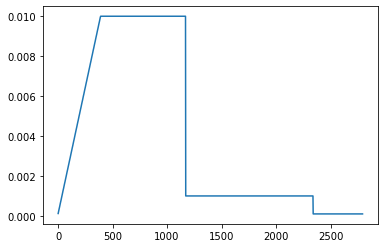

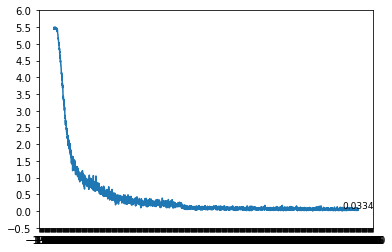

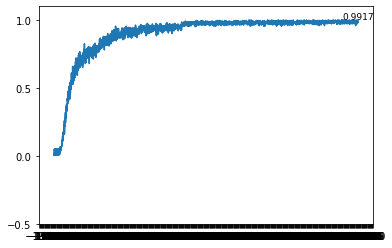

In [2]:
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

file_ = "work_dirs/slowonly_dict_train_usesh_logtop1acc/20210209_112533.log.json"
list = []
for line in open(file_,'r'):
    list.append(line)
lr_list = []
loss_list = []
top1_acc_list = []
cnt = 0
for i in list:
    # if int(''.join(filter(str.isdigit,i.split("epoch")[1].split("iter")[0]))) == cnt:
    #     continue
    lr_block = i.split("lr")[1].split("memory")[0]
    if "e" in lr_block:
        lr_ahead = ''.join(filter(str.isdigit,lr_block.split("e")[0]))
        lr_later = ''.join(filter(str.isdigit,lr_block.split("e")[1]))
        lr_value = lr_ahead + "e-" + lr_later
    else:
        lr_ahead = ''.join(filter(str.isdigit,lr_block.split(".")[0]))
        lr_later = ''.join(filter(str.isdigit,lr_block.split(".")[1]))
        lr_value = lr_ahead + "." + lr_later
    lr_list.append(float(lr_value))
    loss_block = i.split("loss_cls")[1].split("loss")[0]
    loss_ahead = ''.join(filter(str.isdigit,loss_block.split(".")[0]))
    loss_later = ''.join(filter(str.isdigit,loss_block.split(".")[1]))
    loss_value = loss_ahead + "." + loss_later
    loss_list.append(float(loss_value))
    if "top1_acc" in i:
        top1_acc_block = i.split("top1_acc")[1].split("top5_acc")[0]
        top1_acc_ahead = ''.join(filter(str.isdigit,top1_acc_block.split(".")[0]))
        top1_acc_later = ''.join(filter(str.isdigit,top1_acc_block.split(".")[1]))
        top1_acc_value = top1_acc_ahead + "." + top1_acc_later
        top1_acc_list.append(float(top1_acc_value))
    cnt += 1

save_dir = os.path.join("lr_analyze_figures",file_.split("/")[1])
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.figure(1)
plt.plot(range(cnt),lr_list)
plt.savefig(os.path.join(save_dir,"lr.jpg"))
plt.figure(2)
plt.plot(range(cnt),loss_list)
ax = plt.gca()
x_major_locator=MultipleLocator(5)  
ax.xaxis.set_major_locator(x_major_locator)
y_major_locator=MultipleLocator(0.5)  
ax.yaxis.set_major_locator(y_major_locator)
plt.ylim(-0.5,6)
plt.text(cnt, loss_list[-1], '%.4f' % loss_list[-1], ha='center', va= 'bottom',fontsize=9)
plt.savefig(os.path.join(save_dir,"loss.jpg"))
if top1_acc_list:
    plt.figure(3)
    plt.plot(range(cnt),top1_acc_list)
    ax = plt.gca()
    x_major_locator=MultipleLocator(5)  
    ax.xaxis.set_major_locator(x_major_locator)
    y_major_locator=MultipleLocator(0.5)  
    ax.yaxis.set_major_locator(y_major_locator)
    plt.ylim(-0.5,1.1)
    plt.text(cnt, top1_acc_list[-1], '%.4f' % top1_acc_list[-1], ha='center', va= 'bottom',fontsize=9)
    plt.savefig(os.path.join(save_dir,"top1_acc.jpg"))

In [13]:
import os

model_dir = "work_dirs/slowonly_dict_train_usesh_logtop1acc_RGB_mask"

for i in range(71,80):
    model = os.path.join(model_dir,"epoch_{}.pth".format(str(i)))
    os.remove(model)

In [2]:
'计算log文件中不同epoch内的loss大小'
import json
import matplotlib.pyplot as plt
import numpy as np

file_ = "work_dirs_testphase/slowfast_detect_RGB/20210311_150831.log.json"
list = []
for line in open(file_,'r'):
    list.append(line)
lr_list = []
loss_ = []
# top1_acc_list = []
for cnt in range(1,76):
    loss_list = []
    for i in list:
        if int(''.join(filter(str.isdigit,i.split("epoch")[1].split("iter")[0]))) != cnt:
            continue

        loss_block = i.split("loss_cls")[1].split("top1_acc")[0]
        loss_ahead = ''.join(filter(str.isdigit,loss_block.split(".")[0]))
        loss_later = ''.join(filter(str.isdigit,loss_block.split(".")[1]))
        loss_value = loss_ahead + "." + loss_later
        loss_list.append(float(loss_value))
    loss_.append(sum(loss_list[:-1]))
    # if cnt < 54:
    #     loss_.append(sum(loss_list[:-1])/4418*1000)
    # else:
    #     loss_.append(sum(loss_list[:-1])/3742*1000)

In [3]:
np.argsort(loss_)

array([74, 73, 64, 59, 60, 70, 69, 63, 57, 52, 53, 71, 65, 39, 66, 48, 50,
       45, 41, 72, 67, 55, 51, 68, 35, 62, 61, 40, 36, 47, 56, 37, 54, 46,
       44, 42, 49, 33, 38, 58, 28, 32, 43, 31, 34, 30, 29, 25, 27, 26, 24,
       23, 22, 21, 20, 18, 19, 17, 16, 15, 13, 14, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3,  2,  1,  0])

In [1]:
import pandas as pd
prediction = pd.read_csv("val_result/predictions.csv",header=None)
test93 = pd.read_csv("/home/GaoXiang/program_file/AUTSL/mmaction/data/AUTSL/test/test_RGB_pse93.csv",header=None)
cnt = 0
for i in range(len(prediction)):
    if int(prediction.iloc[i,1])==int(test93.iloc[i,0].split(" ")[2]):
        cnt += 1
print(cnt/len(prediction))

FileNotFoundError: [Errno 2] File b'/home/GaoXiang/program_file/temporal-shift-module/val_result/predictions.csv' does not exist: b'/home/GaoXiang/program_file/temporal-shift-module/val_result/predictions.csv'

In [1]:
import pandas as pd
bboxtrainval = pd.read_csv("bboxexpand_label_train_val.csv",header=None)
bboxtest = pd.read_csv("bboxexpand_label_test.csv",header=None)
line1 = []
line2 = []
for i in range(len(bboxtrainval)):
    image_name =bboxtrainval.iloc[i,0].replace("color","depth")
    x1,y1,x2,y2 = bboxtrainval.iloc[i,1:5]
    line1.append([image_name,x1,y1,x2,y2])
for i in range(len(bboxtest)):
    image_name = bboxtest.iloc[i,0].replace("color","depth")
    x1,y1,x2,y2 = bboxtest.iloc[i,1:5]
    line2.append([image_name,x1,y1,x2,y2])
data1 = pd.DataFrame(data=line1)
data2 = pd.DataFrame(data=line2)
data1.to_csv("bboxexpand_label_train_val_depth.csv",header=None,index=None,sep=",")
data2.to_csv("bboxexpand_label_test_depth.csv",header=None,index=None,sep=",")


In [2]:
'add test pseudo label bbox'
import pandas as pd
bboxexpand_train_val_RGB = pd.read_csv("bboxexpand_label_train_val_RGB.csv",header=None)
train_val_label = pd.read_csv("/home/GaoXiang/program_file/AUTSL/mmaction/data/AUTSL/train/train_val_testv1_RGB_rawframes.csv",header=None)
bbox_test = pd.read_csv("bboxexpand_label_test.csv",header=None)
line = []
for i in range(len(bboxexpand_train_val_RGB)):
    image_name = bboxexpand_train_val_RGB.iloc[i,0]
    x1,y1,x2,y2 = bboxexpand_train_val_RGB.iloc[i,1:5]
    line.append([image_name,x1,y1,x2,y2])
for i in range(32560,len(train_val_label)):
    image_name = train_val_label.iloc[i,0].split(" ")[0].split("/")[2]
    index = bbox_test[(bbox_test[0]==image_name)].index.item()
    x1,y1,x2,y2 = bbox_test.iloc[index,1:5]
    line.append([image_name,x1,y1,x2,y2])
data = pd.DataFrame(data=line)
data.to_csv("bboxexpand_label_train_val_testv1_RGB.csv",header=None,index=None,sep=",")

In [1]:
import pandas as pd
bbox_train_val_test = pd.read_csv("bboxexpand_label_train_val_testv1_RGB.csv",header=None)
line = []
for i in range(len(bbox_train_val_test)):
    image_name = bbox_train_val_test.iloc[i,0].replace("color","depth")
    x1,y1,x2,y2 = bbox_train_val_test.iloc[i,1:5]
    line.append([image_name,x1,y1,x2,y2])
data = pd.DataFrame(data=line)
data.to_csv("bboxexpand_label_train_val_testv1_depth.csv",header=None,index=None,sep=",")

In [2]:
import pandas as pd
test93 = pd.read_csv("/home/GaoXiang/program_file/AUTSL/mmaction/data/AUTSL/test/test_depth_pse93.csv",header=None)
test95 = pd.read_csv("predictions_95.csv",header=None)
line = []
for i in range(len(test95)):
    image_name = test93.iloc[i,0].split(" ")[0]
    num_frames = test93.iloc[i,0].split(" ")[1]
    label = test95.iloc[i,1]
    line.append([image_name,num_frames,label])
data = pd.DataFrame(data=line)
data.to_csv("slowfast_pseudo95_depth.csv",header=None,index=None,sep=" ")